In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\coding\python\AQI_Predictor\delhi_aqi_with_full_index.csv")

In [3]:
df

,date,AQI,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,446,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,480,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,486,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,482,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,479,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,386,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,381,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,394,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,335,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [4]:
df.describe()

,AQI,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,275.339263,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,127.027504,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,8.000000,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,158.000000,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,304.000000,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,380.000000,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,500.000000,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [5]:
df.shape

(18776, 10)

In [6]:
df.isnull().sum()

date     0
AQI      0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [7]:
predictors =  ['pm2_5','pm10','co','no','no2','o3','so2','nh3']

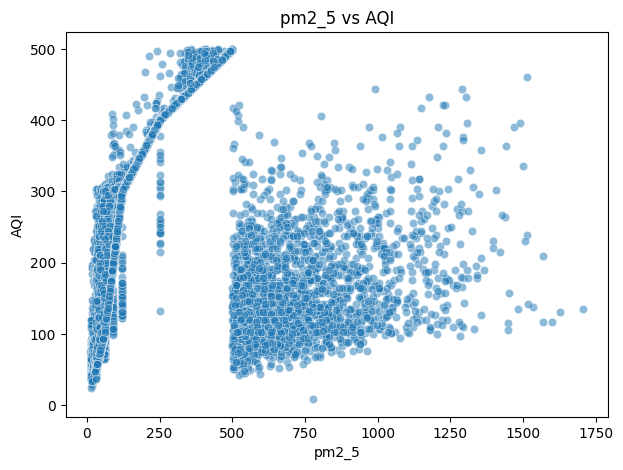

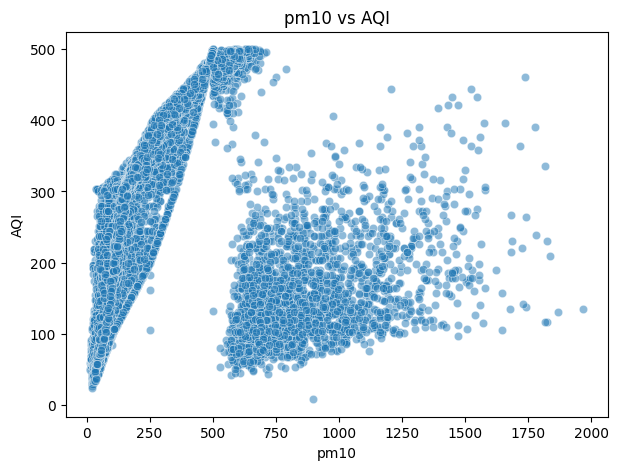

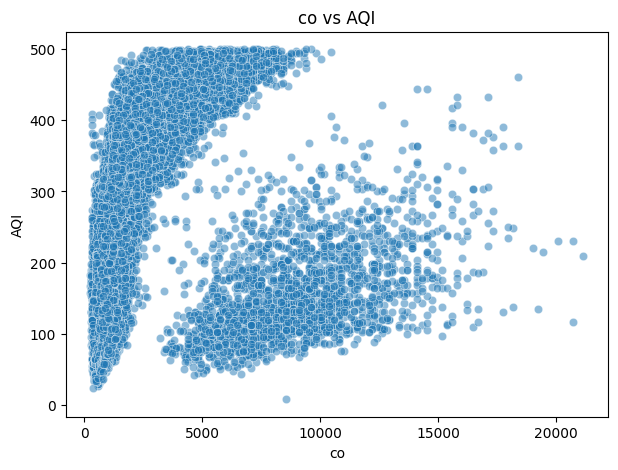

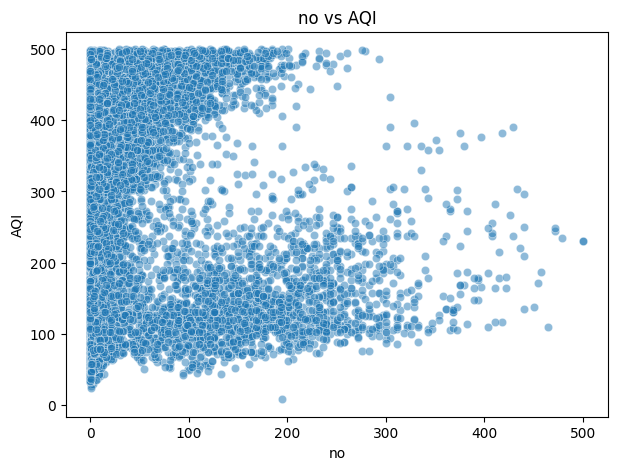

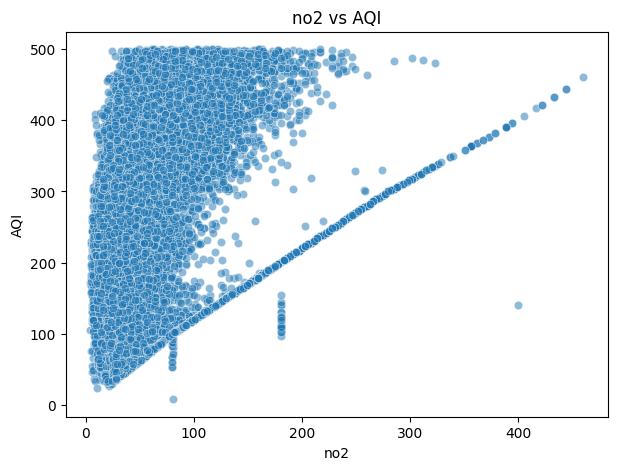

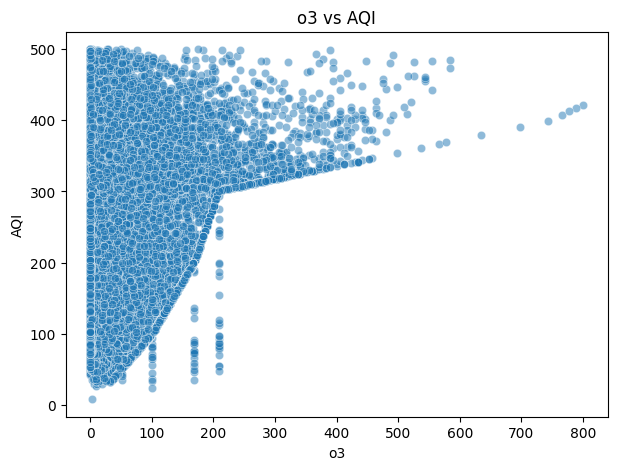

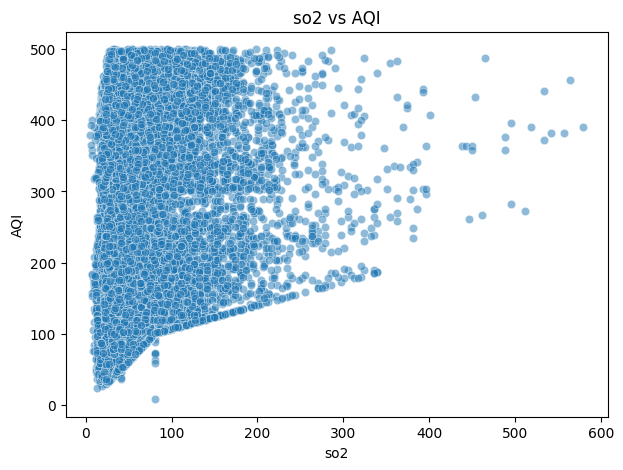

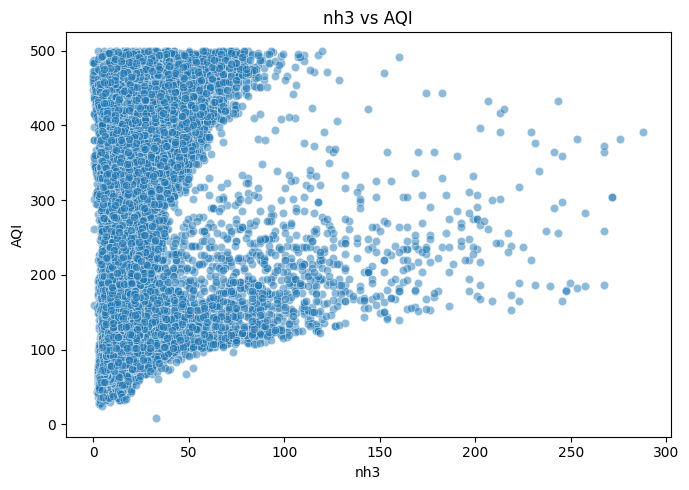

In [8]:
for col in predictors:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x = df[col],y = df['AQI'],alpha = 0.5)
    plt.title(f'{col} vs AQI' )
    plt.xlabel(f'{col}')
    plt.ylabel('AQI')

plt.tight_layout()
plt.show()

In [9]:
import statsmodels.api as sm

In [10]:
X = df[predictors]
y = df['AQI']

In [11]:
X = sm.add_constant(X)

In [12]:
model = sm.OLS(y,X)
results = model.fit()

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     358.9
Date:                Fri, 08 Aug 2025   Prob (F-statistic):               0.00
Time:                        01:07:46   Log-Likelihood:            -1.1626e+05
No. Observations:               18776   AIC:                         2.325e+05
Df Residuals:                   18767   BIC:                         2.326e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        199.3100      2.018     98.760      0.000     195.354     203.266
pm2_5         -0.1014      0.029     -3.549      0.000      -0.157      -0.045
pm10           0.2406      0.026      9.174      0.000       0.189       0.292
co             0.0013      0.002      0.597      0.550      -0.003       0.006
no            -0.8763      0.052    -16.894      0.000      -0.978      -0.775
no2            0.6985      0.049     14.161      0.000       0.602       0.795
o3             0.1237      0.014      9.022      0.000       0.097       0.151
so2            0.0362      0.033      1.107      0.268      -0.028       0.100
nh3           -0.1043      0.067     -1.566      0.117      -0.235       0.026
==============================================================================
Omnibus:                     1945.703   Durbin-Watson:                   0.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.768
Skew:                          -0.078   Prob(JB):                    1.15e-124
Kurtosis:                       2.160   Cond. No.                     9.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  feature        VIF
0   const   5.461994
1   pm2_5  56.140260
2    pm10  65.848316
3      co  55.478038
4      no  13.927465
5     no2   7.683891
6      o3   1.631788
7     so2   3.498715
8     nh3   4.144428


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import sklearn

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
predictions = model.predict(X_test)

In [21]:
predictions

array([363.47163945, 342.53611871, 278.57756561, ..., 268.24425467,
       272.28043593, 255.84860737], shape=(3756,))

In [22]:
y_test

10876    198
13204    383
1862     141
2699     190
18191    400
        ... 
12496    127
8541     427
16844    345
12035    136
5587     279
Name: AQI, Length: 3756, dtype: int64

In [23]:
print("MSE:", mean_squared_error(y_test,predictions))
print("R2_score:",r2_score(y_test,predictions))

MSE: 14107.176760987855
R2_score: 0.13839810296170374


In [24]:
model_2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_2.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
predictions_2 = model_2.predict(X_test)

In [26]:
predictions_2

array([198.  , 383.  , 141.  , ..., 344.98, 136.76, 279.  ], shape=(3756,))

In [27]:
y_test

10876    198
13204    383
1862     141
2699     190
18191    400
        ... 
12496    127
8541     427
16844    345
12035    136
5587     279
Name: AQI, Length: 3756, dtype: int64

In [28]:
print("MSE:", mean_squared_error(y_test,predictions_2))
print("R2_score:",r2_score(y_test,predictions_2))

MSE: 51.62807127263048
R2_score: 0.9968467933093501


In [29]:
kf = KFold(n_splits= 5,shuffle = True , random_state= 42)

In [30]:
kf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [31]:
mse_list = []
r_2_list = []

In [32]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    kf_model.fit(X_train, y_train)
    y_pred = kf_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    r_2_list.append(r2)

In [33]:
mse_list

[55.321718450479246,
 16.602751930758988,
 21.583890412782957,
 6.83216548601864,
 14.545656537949405]

In [34]:
r_2_list

[0.9966212022170045,
 0.9989828529999109,
 0.9986459262407822,
 0.9995830993684044,
 0.9990700176818866]

In [35]:
print("Average MSE:", np.mean(mse_list))
print("Average R² Score:", np.mean(r_2_list))

Average MSE: 22.97723656359785
Average R² Score: 0.9985806197015977


In [37]:
predictors_2 =  ['pm2_5','pm10','co','no2','o3','so2']

In [38]:
X_2 = df[predictors_2]
y = df['AQI']

In [39]:
mse_list_2 = []
r_2_list_2 = []

In [40]:
for train_index, test_index in kf.split(X_2):
    X_train, X_test = X_2.iloc[train_index], X_2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    kf_model.fit(X_train, y_train)
    y_pred = kf_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list_2.append(mse)
    r_2_list_2.append(r2)

In [41]:
mse_list_2

[54.43706749201279,
 16.974335605858855,
 21.150576671105192,
 6.603059280958722,
 13.144605139813583]

In [42]:
r_2_list_2

[0.9966752326553371,
 0.9989600883870331,
 0.998673110346886,
 0.9995970794925374,
 0.999159594458544]

In [43]:
print("Average MSE:", np.mean(mse_list_2))
print("Average R² Score:", np.mean(r_2_list))

Average MSE: 22.461928837949827
Average R² Score: 0.9985806197015977


In [46]:
X_check = pd.DataFrame([{
    'pm2_5': 28,
    'pm10': 89,
    'co' : 471,
    'no2': 10,
    'o3': 9,
    'so2': 3,
}])
predict = kf_model.predict(X_check)
print(predict)

[88.22]


In [48]:
final_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [49]:
final_model.fit(X_2,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
X_check = pd.DataFrame([{
    'pm2_5': 28,
    'pm10': 89,
    'co' : 471,
    'no2': 10,
    'o3': 9,
    'so2': 3,
}])
predict = final_model.predict(X_check)
print(predict)

[88.5]


In [7]:
import joblib

In [52]:
joblib.dump(final_model,'manual_model.pkl')

['manual_model.pkl']

In [13]:
test_model = joblib.load('manual_model.pkl')

In [17]:
X_check = pd.DataFrame([{
    'pm2_5': 28,
    'pm10': 89,
    'co' : 471,
    'no2': 10,
    'o3': 9,
    'so2': 3,
}])
predict = test_model.predict(X_check)
print(predict)

[88.5]


Doing Time series analysis of the Data

In [48]:
df['date'] = pd.to_datetime(df['date'])  
df = df.sort_values('date').reset_index(drop=True)  


In [47]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['AQI'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])  # p < 0.05 suggests stationarity


ADF Statistic: -11.913202589767652
p-value: 5.237649555202867e-22


since P value is << 0.05 we will be rejecting the null Hypothesis of H0 : The series is Non-stationary 

Creating Lag Features

In [48]:
lags = 3

In [49]:
for col in predictors_2:
    for lag in range(1, lags + 1):
        df[f'{col}_lag{lag}'] = df[col].shift(lag)

Analyzing ACF & PCF 

<Figure size 1200x500 with 0 Axes>

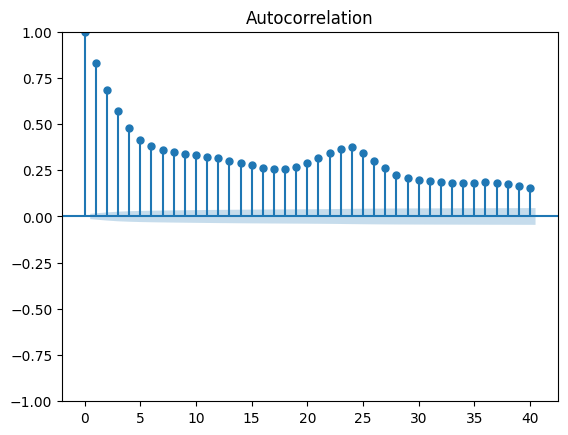

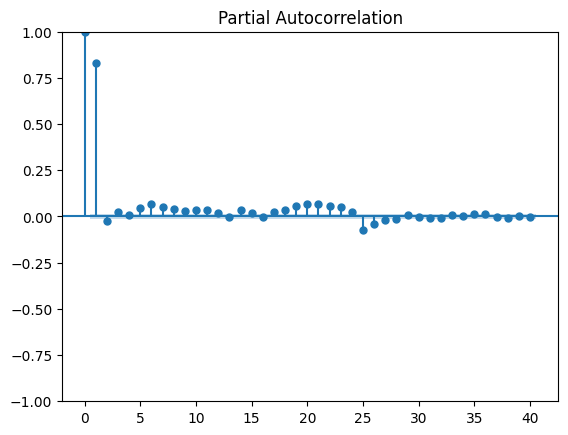

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))
plot_acf(df['AQI'].dropna(), lags=40)
plot_pacf(df['AQI'].dropna(), lags=40)
plt.show()


Checking For Seasonality

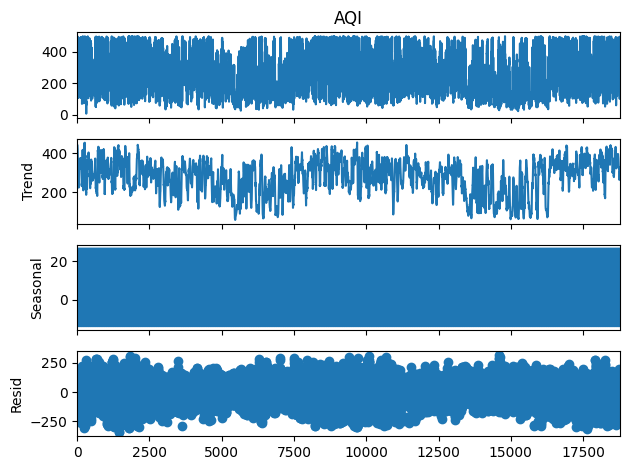

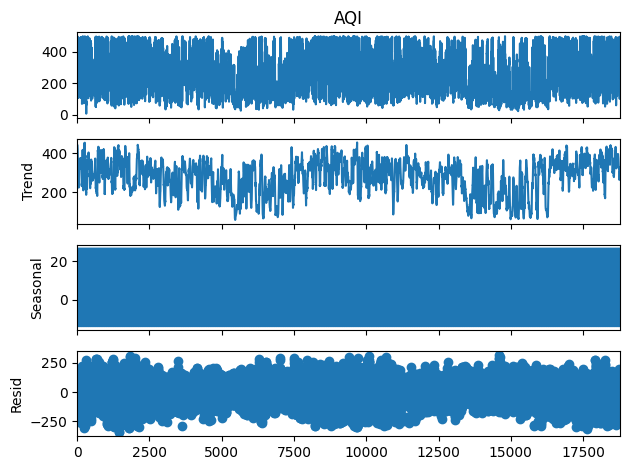

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(y, model='additive', period=24).plot()  

- Trend Seems to be a Bit Fluctuating but showing a long term upward and downward movement  
- As For Seasonality,Since The Graphs Is Flat We Can Conclude There Exists No Seasonality  
- Residuals Seems Noisy 

- Checking Correlation

In [52]:
for col in predictors_2:
    for lag in range(1, 4):
        df[f'{col}_lag{lag}'] = df[col].shift(lag)
df.corr()['AQI']


date         -0.018914
AQI           1.000000
co            0.112904
no           -0.016196
no2           0.251893
o3            0.035379
so2           0.154093
pm2_5         0.156035
pm10          0.159239
nh3           0.101259
pm2_5_lag1    0.159452
pm2_5_lag2    0.166149
pm2_5_lag3    0.176802
pm10_lag1     0.160999
pm10_lag2     0.165837
pm10_lag3     0.174799
co_lag1       0.112082
co_lag2       0.114832
co_lag3       0.122898
no2_lag1      0.242774
no2_lag2      0.207160
no2_lag3      0.168072
o3_lag1       0.023094
o3_lag2       0.020139
o3_lag3       0.020262
so2_lag1      0.131550
so2_lag2      0.103698
so2_lag3      0.076991
nh3_lag1      0.075491
nh3_lag2      0.057108
nh3_lag3      0.050242
Name: AQI, dtype: float64

- Plotting

In [53]:
from statsmodels.tsa.stattools import grangercausalitytests


In [54]:
for col in predictors_2:
    print(f"\nTesting if {col} Granger-causes AQI:")
    try:
        grangercausalitytests(df[['AQI', col]], maxlag=3, verbose=False)
    except Exception as e:
        print(f"Error with {col}: {e}")



Testing if pm2_5 Granger-causes AQI:

Testing if pm10 Granger-causes AQI:

Testing if co Granger-causes AQI:

Testing if no2 Granger-causes AQI:

Testing if o3 Granger-causes AQI:


c:\Users\User\OneDrive\Desktop\coding\python\my_venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\User\OneDrive\Desktop\coding\python\my_venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\User\OneDrive\Desktop\coding\python\my_venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\User\OneDrive\Desktop\coding\python\my_venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\User\OneDrive\Desktop\coding\python\my_venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.w


Testing if so2 Granger-causes AQI:

Testing if nh3 Granger-causes AQI:


c:\Users\User\OneDrive\Desktop\coding\python\my_venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\User\OneDrive\Desktop\coding\python\my_venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


- Selecting Best Predictors After Analyzing correlations 

In [55]:
#Dropping Non-Lagged columns...
columns_to_drop = ['no2', 'pm2_5', 'pm10', 'co', 'so2', 'no', 'o3', 'nh3']
df_cleaned = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [56]:
df_cleaned = df_cleaned.dropna()

In [57]:
endog = df_cleaned['AQI']
exog_columns = [
    'no2_lag1', 'no2_lag2', 'no2_lag3',
    'pm2_5_lag1', 'pm2_5_lag2', 'pm2_5_lag3',
    'pm10_lag1', 'pm10_lag2', 'pm10_lag3'
]

In [58]:
exog = df_cleaned[exog_columns]

- Creating an ARIMAX Model Using Scikit-Learn & numpy

In [1]:
class ARIMAXScratch:
    def __init__(self, ar_order=3, ma_order=2, diff_order=0, exog_lags=3):
        self.ar_order = ar_order
        self.ma_order = ma_order
        self.diff_order = diff_order
        self.exog_lags = exog_lags
        self.model = LinearRegression()
        self.scaler = StandardScaler()
        self.fitted = False
        self.last_residuals = None
        self.last_aqi_values = None
        self.columns = None
        self.exog_cols = None

    def difference(self, series, order=1):
        result = series.copy()
        for _ in range(order):
            result = result.diff()
        return result

    def inverse_difference(self, pred_diff, history, order=1):
        if order == 0:
            return pred_diff
        result = pred_diff
        for i in range(order):
            result += history[-1 - i]
        return result

    def create_lags(self, df, col, lags, prefix=None):
        for i in range(1, lags + 1):
            df[f"{prefix or col}_lag{i}"] = df[col].shift(i)
        return df

    def fit(self, df, target_col='AQI', exog_cols=[]):
        if not isinstance(exog_cols, list):
            raise ValueError("exog_cols must be a list of column names")
        if not isinstance(target_col, str):
            raise ValueError("target_col must be a string")
        if not all(col in df.columns for col in exog_cols + [target_col]):
            raise ValueError("Some columns not found in DataFrame")

        df = df.copy().fillna(method='ffill')
        self.exog_cols = exog_cols

        # Scale exogenous variables
        if exog_cols:
            df[exog_cols] = self.scaler.fit_transform(df[exog_cols])

        # Store last d AQI values for inverse differencing
        self.last_aqi_values = df[target_col].iloc[-self.diff_order:].values[::-1] if self.diff_order > 0 else np.array([])

        # Differencing
        df['target'] = self.difference(df[target_col], self.diff_order)

        # AR lags
        df = self.create_lags(df, 'target', self.ar_order, prefix='AQI')

        # Exogenous lags
        for exog in exog_cols:
            df = self.create_lags(df, exog, self.exog_lags)

        df.dropna(inplace=True)

        # Fit once to get residuals (MA)
        feature_cols = [col for col in df.columns if col.startswith('AQI_lag') or any(col.startswith(f'{exog}_lag') for exog in exog_cols)]
        X_temp = df[feature_cols]
        y_temp = df['target']
        self.model.fit(X_temp, y_temp)
        preds = self.model.predict(X_temp)
        df['residual'] = y_temp - preds

        # MA lags
        df = self.create_lags(df, 'residual', self.ma_order)

        df.dropna(inplace=True)

        # Final train
        self.columns = [col for col in df.columns if col.startswith(('AQI_lag', 'residual_lag') + tuple(f'{exog}_lag' for exog in exog_cols))]
        X = df[self.columns]
        y = df['target']
        self.model.fit(X, y)

        # Store last residuals
        self.last_residuals = df['residual'].iloc[-self.ma_order:].values[::-1]
        self.fitted = True

        return self

    def predict(self, df_future, horizon=1):
        if not self.fitted:
            raise Exception("Model not fitted.")

        if len(df_future) < max(self.ar_order, self.exog_lags) + 1:
            raise ValueError(f"Need at least {max(self.ar_order, self.exog_lags) + 1} rows for prediction")

        df = df_future.copy().fillna(method='ffill')
        if self.exog_cols:
            df[self.exog_cols] = self.scaler.transform(df[self.exog_cols])

        # Initialize predictions
        y_pred = []
        current_residuals = self.last_residuals.copy()
        current_aqi_values = self.last_aqi_values.copy()
        df['target'] = self.difference(df['AQI'], self.diff_order)

        # Prepare initial features
        df = self.create_lags(df, 'target', self.ar_order, prefix='AQI')
        for exog in self.exog_cols:
            df = self.create_lags(df, exog, self.exog_lags)
        df.dropna(inplace=True)

        for h in range(horizon):
            if len(df) < h + 1:
                raise ValueError(f"Not enough data for {h+1}-step forecast")
            
            # Prepare features for one step
            row = {}
            for i in range(1, self.ar_order + 1):
                row[f'AQI_lag{i}'] = df['target'].shift(h).iloc[-1] if h == 0 else y_pred[-i] if i <= len(y_pred) else df['target'].iloc[-i]
            for exog in self.exog_cols:
                for i in range(1, self.exog_lags + 1):
                    row[f'{exog}_lag{i}'] = df[f'{exog}_lag{i}'].iloc[-1 - h]
            for i in range(1, self.ma_order + 1):
                row[f'residual_lag{i}'] = current_residuals[i - 1]

            # Predict
            row_df = pd.DataFrame([row])[self.columns]
            y_diff_pred = self.model.predict(row_df)[0]

            # Inverse differencing
            y_pred_h = self.inverse_difference(y_diff_pred, current_aqi_values, self.diff_order)
            y_pred.append(y_pred_h)

            # Update residuals and AQI values
            new_residual = (df['target'].iloc[-1 - h] if h < len(df) else y_diff_pred) - y_diff_pred
            current_residuals = np.insert(current_residuals, 0, new_residual)[:self.ma_order]
            if self.diff_order > 0:
                current_aqi_values = np.insert(current_aqi_values, 0, y_pred_h)[:self.diff_order]

        return np.array(y_pred)

In [2]:
# Train-test split
train_size = int(0.8 * len(df))
train = df[:train_size]
test = df[train_size:]

NameError: name 'df' is not defined

In [3]:
# Fitting model
model = ARIMAXScratch(ar_order=3, ma_order=1, diff_order=0, exog_lags=3)
model.fit(train, target_col = 'AQI', exog_cols = exog_columns)

NameError: name 'LinearRegression' is not defined

- New Approach

In [10]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [11]:
target_col = 'AQI'
forecast_horizon = 6
lags = 6  # Increased based on ACF
features_to_lag = ['AQI', 'pm2_5', 'pm10', 'co', 'no2', 'so2', 'o3', 'nh3']

In [12]:
# Create lagged features
for feature in features_to_lag:
    for lag in range(1, lags + 1):
        df[f'{feature}_lag{lag}'] = df[feature].shift(lag)

In [13]:
# Create target
df[f'{target_col}_t_plus_{forecast_horizon}'] = df[target_col].shift(-forecast_horizon)

In [14]:
# Add temporal features
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)

In [15]:
# Drop NaN
df_supervised = df.dropna().copy()

In [16]:
# Features and target
feature_cols = [col for col in df_supervised.columns if 'lag' in col or col in ['hour', 'dayofweek', 'sin_hour', 'cos_hour']]
target_column = f'{target_col}_t_plus_{forecast_horizon}'

In [17]:
X_tsa = df_supervised[feature_cols]
y_tsa = df_supervised[target_column]

In [18]:
# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [19]:
tsa_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [20]:
tsa_mae_list = []
tsa_mse_list = []
tsa_rmse_list = []

In [45]:
for train_index, test_index in tscv.split(X_tsa):
    X_train, X_test = X_tsa.iloc[train_index], X_tsa.iloc[test_index]
    y_train, y_test = y_tsa.iloc[train_index], y_tsa.iloc[test_index]
    tsa_model.fit(X_train, y_train)
    y_pred = tsa_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    tsa_mae_list.append(mae)
    tsa_mse_list.append(mse)
    tsa_rmse_list.append(rmse)

In [46]:
print(f'Average MAE: {np.mean(tsa_mae_list):.2f}')
print(f'Average MSE: {np.mean(tsa_mse_list):.2f}')
print(f'Average RMSE: {np.mean(tsa_rmse_list):.2f}')

Average MAE: 87.91
Average MSE: 11898.85
Average RMSE: 108.96


In [47]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X_tsa.columns, 'importance': tsa_model.feature_importances_})
print("\nFeature Importance:\n", feature_importance.sort_values('importance', ascending=False))


Feature Importance:
        feature  importance
6   pm2_5_lag1    0.162988
0     AQI_lag1    0.053591
30    so2_lag1    0.032367
47    nh3_lag6    0.029367
11  pm2_5_lag6    0.027583
12   pm10_lag1    0.025383
48        hour    0.023470
35    so2_lag6    0.020503
50    sin_hour    0.019759
17   pm10_lag6    0.019006
36     o3_lag1    0.018862
42    nh3_lag1    0.018834
24    no2_lag1    0.018556
34    so2_lag5    0.018461
31    so2_lag2    0.018122
37     o3_lag2    0.017340
18     co_lag1    0.017210
51    cos_hour    0.017002
46    nh3_lag5    0.016179
29    no2_lag6    0.015877
41     o3_lag6    0.015876
5     AQI_lag6    0.015825
1     AQI_lag2    0.015179
49   dayofweek    0.015093
45    nh3_lag4    0.014701
33    so2_lag4    0.014381
43    nh3_lag2    0.014349
7   pm2_5_lag2    0.014154
23     co_lag6    0.014050
44    nh3_lag3    0.013919
13   pm10_lag2    0.013848
25    no2_lag2    0.013586
32    so2_lag3    0.013509
8   pm2_5_lag3    0.013203
19     co_lag2    0.012996
26    

- Time For some Hyperparameter Tuning 

In [22]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [23]:
rf_model = RandomForestRegressor(random_state=42) #initializing random forest model

In [79]:
# Performing grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_tsa, y_tsa)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,TimeSeriesSpl...est_size=None)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [80]:
# Best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best MSE: {-grid_search.best_score_:.2f}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best MSE: 11722.36


- Fitting our newly tuned model 

In [53]:
best_params = {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 1}

In [54]:
new_tsa_model = RandomForestRegressor(**best_params, random_state=42)

In [56]:
tsa_mae_list_new =  []
tsa_mse_list_new =  []
tsa_rmse_list_new = []

In [57]:
for train_index, test_index in tscv.split(X_tsa):
    X_train, X_test = X_tsa.iloc[train_index], X_tsa.iloc[test_index]
    y_train, y_test = y_tsa.iloc[train_index], y_tsa.iloc[test_index]
    new_tsa_model.fit(X_train, y_train)
    y_pred = new_tsa_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    tsa_mae_list_new.append(mae)
    tsa_mse_list_new.append(mse)
    tsa_rmse_list_new.append(rmse)

In [58]:
print(f'Average MAE: {np.mean(tsa_mae_list_new):.2f}')
print(f'Average MSE: {np.mean(tsa_mse_list_new):.2f}')
print(f'Average RMSE: {np.mean(tsa_rmse_list_new):.2f}')

Average MAE: 87.36
Average MSE: 11732.86
Average RMSE: 108.20


In [109]:
model_features = new_tsa_model.feature_names_in_
print(model_features)

['AQI_lag1' 'AQI_lag2' 'AQI_lag3' 'AQI_lag4' 'AQI_lag5' 'AQI_lag6'
 'pm2_5_lag1' 'pm2_5_lag2' 'pm2_5_lag3' 'pm2_5_lag4' 'pm2_5_lag5'
 'pm2_5_lag6' 'pm10_lag1' 'pm10_lag2' 'pm10_lag3' 'pm10_lag4' 'pm10_lag5'
 'pm10_lag6' 'co_lag1' 'co_lag2' 'co_lag3' 'co_lag4' 'co_lag5' 'co_lag6'
 'no2_lag1' 'no2_lag2' 'no2_lag3' 'no2_lag4' 'no2_lag5' 'no2_lag6'
 'so2_lag1' 'so2_lag2' 'so2_lag3' 'so2_lag4' 'so2_lag5' 'so2_lag6'
 'o3_lag1' 'o3_lag2' 'o3_lag3' 'o3_lag4' 'o3_lag5' 'o3_lag6' 'nh3_lag1'
 'nh3_lag2' 'nh3_lag3' 'nh3_lag4' 'nh3_lag5' 'nh3_lag6' 'hour' 'dayofweek'
 'sin_hour' 'cos_hour']


- Doing predicitons

In [ ]:
ddata = {
    'date': pd.date_range(end='2025-08-05 20:00:00+0530', periods=6, freq='H'),  # 03:00 PM to 08:00 PM
    'AQI': [81,85,80,80,83,80],    # 03:00 PM to 08:00 PM; replace with actual AQI
    'pm2_5': [24, 27, 25, 25, 26, 25],        # 03:00 PM to 08:00 PM
    'pm10': [98, 109, 90, 83, 97, 93],         # 03:00 PM to 08:00 PM
    'co': [491, 491, 491, 507, 541, 611],     # 03:00 PM to 08:00 PM
    'no2': [10, 10, 10, 11, 12, 12],          # 03:00 PM to 08:00 PM
    'so2': [3, 3, 3, 3, 3, 3],                # 03:00 PM to 08:00 PM
    'o3': [11, 11, 11, 10, 10, 9],            # 03:00 PM to 08:00 PM
    'nh3': [14, 14, 14, 4, 7, 7]              # 03:00 PM to 08:00 PM
}

C:\Users\User\AppData\Local\Temp\ipykernel_15296\237641972.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'date': pd.date_range(end='2025-08-05 20:00:00+0530', periods=6, freq='H'),  # 03:00 PM to 08:00 PM


In [100]:
df_past = pd.DataFrame(data)
df_past.set_index('date', inplace=True)

In [101]:
# Create lagged features for the last row (08:00 PM IST)
prediction_df = pd.DataFrame()
features = ['pm2_5', 'pm10', 'co', 'no2', 'so2', 'o3', 'nh3']

In [ ]:
for feature in features:
    for lag in range(1, 7):  # 6 lags for all variables
        prediction_df[f'{feature}_lag{lag}'] = df_past[feature].shift(lag).iloc[-1]

In [ ]:
# Add temporal features for prediction time (10:00 PM IST, Tuesday)
prediction_time = pd.Timestamp('2025-08-05 22:00:00+0530')
prediction_df['hour'] = prediction_time.hour
prediction_df['dayofweek'] = prediction_time.dayofweek
prediction_df['sin_hour'] = np.sin(2 * np.pi * prediction_df['hour'] / 24)
prediction_df['cos_hour'] = np.cos(2 * np.pi * prediction_df['hour'] / 24)

In [ ]:
# Ensure column order matches training (use the exact feature_cols from your model)
feature_cols = [
    'AQI_lag1', 'AQI_lag2', 'AQI_lag3', 'AQI_lag4', 'AQI_lag5', 'AQI_lag6',
    'pm2_5_lag1', 'pm2_5_lag2', 'pm2_5_lag3', 'pm2_5_lag4', 'pm2_5_lag5', 'pm2_5_lag6',
    'pm10_lag1', 'pm10_lag2', 'pm10_lag3', 'pm10_lag4', 'pm10_lag5', 'pm10_lag6',
    'co_lag1', 'co_lag2', 'co_lag3', 'co_lag4', 'co_lag5', 'co_lag6',
    'no2_lag1', 'no2_lag2', 'no2_lag3', 'no2_lag4', 'no2_lag5', 'no2_lag6',
    'so2_lag1', 'so2_lag2', 'so2_lag3', 'so2_lag4', 'so2_lag5', 'so2_lag6',
    'o3_lag1', 'o3_lag2', 'o3_lag3', 'o3_lag4', 'o3_lag5', 'o3_lag6',
    'nh3_lag1', 'nh3_lag2', 'nh3_lag3', 'nh3_lag4', 'nh3_lag5', 'nh3_lag6',
    'hour', 'dayofweek', 'sin_hour', 'cos_hour'
]

In [107]:
prediction_df = prediction_df[feature_cols]

In [108]:
# Make prediction
prediction = new_tsa_model.predict(prediction_df)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- co_lag4
- co_lag5
- co_lag6
- nh3_lag4
- nh3_lag5
- ...


- Creating Fresh DataFrame TO Fit Model Based On The Important Features Only...

In [25]:
df_fresh = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\coding\python\AQI_Predictor\delhi_aqi_with_full_index.csv')
df_fresh['date'] = pd.to_datetime(df_fresh['date'])
df_fresh.set_index('date', inplace=True)

In [26]:
target_col = 'AQI'
forecast_horizon = 6
lags = 12  # Caps lags at 12 hours
essential_features = ['AQI', 'pm2_5', 'pm10', 'no2']

- Creating New Lag Features

In [27]:
for feature in essential_features:
    for lag in range(1, lags + 1):
        df_fresh[f'{feature}_lag{lag}'] = df_fresh[feature].shift(lag)

Craeting Target

In [28]:
df_fresh[f'{target_col}_t_plus_{forecast_horizon}'] = df_fresh[target_col].shift(-forecast_horizon)

In [29]:
# Add temporal features
df_fresh['hour'] = df_fresh.index.hour
df_fresh['dayofweek'] = df_fresh.index.dayofweek
df_fresh['sin_hour'] = np.sin(2 * np.pi * df_fresh['hour'] / 24)
df_fresh['cos_hour'] = np.cos(2 * np.pi * df_fresh['hour'] / 24)

In [30]:
# Drop NaN
df_fresh_supervised = df_fresh.dropna().copy()

In [31]:
# Update feature columns
feature_cols = [col for col in df_fresh_supervised.columns if 'lag' in col or col in ['hour', 'dayofweek', 'sin_hour', 'cos_hour']]

In [32]:
# Features and target
X_tsa_fresh = df_fresh_supervised[feature_cols]
y_tsa_fresh = df_fresh_supervised[f'{target_col}_t_plus_{forecast_horizon}']

- Defining Our new Random Forest Model

In [33]:
best_params = {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 1}
new_rf_tsa_model = RandomForestRegressor(**best_params, random_state=42)

In [34]:
fresh_tsa_mae_list = []
fresh_tsa_mse_list = []
fresh_tsa_rmse_list = []

- Training Using Time series Cross Validation

In [103]:
for train_index, test_index in tscv.split(X_tsa_fresh):
    X_train, X_test = X_tsa_fresh.iloc[train_index], X_tsa_fresh.iloc[test_index]
    y_train, y_test = y_tsa_fresh.iloc[train_index], y_tsa_fresh.iloc[test_index]
    new_rf_tsa_model.fit(X_train, y_train)
    y_pred = new_rf_tsa_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    fresh_tsa_mae_list.append(mae)
    fresh_tsa_mse_list.append(mse)
    fresh_tsa_rmse_list.append(rmse)

In [104]:
print(f'Average MAE: {np.mean(fresh_tsa_mae_list):.2f}')
print(f'Average MSE: {np.mean(fresh_tsa_mse_list):.2f}')
print(f'Average RMSE: {np.mean(fresh_tsa_rmse_list):.2f}')

Average MAE: 87.62
Average MSE: 11716.08
Average RMSE: 108.15


- Checking Feature Importance 

In [106]:
feature_importance = pd.DataFrame({'feature': X_tsa_fresh.columns, 'importance': new_rf_tsa_model.feature_importances_})
print("\nFeature Importance:\n", feature_importance.sort_values('importance', ascending=False))


Feature Importance:
         feature  importance
12   pm2_5_lag1    0.174635
0      AQI_lag1    0.059801
24    pm10_lag1    0.029704
48         hour    0.028781
36     no2_lag1    0.025361
47    no2_lag12    0.023266
17   pm2_5_lag6    0.021296
51     cos_hour    0.020866
50     sin_hour    0.020774
11    AQI_lag12    0.019006
42     no2_lag7    0.016923
37     no2_lag2    0.016735
2      AQI_lag3    0.016053
38     no2_lag3    0.015992
41     no2_lag6    0.015950
49    dayofweek    0.015860
43     no2_lag8    0.015759
1      AQI_lag2    0.015523
29    pm10_lag6    0.015367
25    pm10_lag2    0.015363
39     no2_lag4    0.015361
40     no2_lag5    0.015283
3      AQI_lag4    0.015240
35   pm10_lag12    0.014953
8      AQI_lag9    0.014908
23  pm2_5_lag12    0.014808
9     AQI_lag10    0.014734
5      AQI_lag6    0.014631
46    no2_lag11    0.014357
4      AQI_lag5    0.013866
44     no2_lag9    0.013851
45    no2_lag10    0.013823
10    AQI_lag11    0.013762
30    pm10_lag7    0.01355

- Doing HyperParameter Tuning On New Model For Fresh DataFrame

In [2]:
param_grid = {
    'n_estimators': [250, 300, 350],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [35]:
tuned_rf_tsa_model = RandomForestRegressor(random_state=42)

In [36]:
grid_search = GridSearchCV(estimator=tuned_rf_tsa_model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_tsa_fresh, y_tsa_fresh)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,TimeSeriesSpl...est_size=None)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [37]:
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best MSE: {-grid_search.best_score_:.2f}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best MSE: 11699.91


In [38]:
new_tuned_rf_tsa_model = tuned_rf_tsa_model

In [39]:
for train_index, test_index in tscv.split(X_tsa_fresh):
    X_train, X_test = X_tsa_fresh.iloc[train_index], X_tsa_fresh.iloc[test_index]
    y_train, y_test = y_tsa_fresh.iloc[train_index], y_tsa_fresh.iloc[test_index]
    new_tuned_rf_tsa_model.fit(X_train, y_train)
    y_pred = new_tuned_rf_tsa_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    fresh_tsa_mae_list.append(mae)
    fresh_tsa_mse_list.append(mse)
    fresh_tsa_rmse_list.append(rmse)

In [40]:
print(f'Average MAE: {np.mean(fresh_tsa_mae_list):.2f}')
print(f'Average MSE: {np.mean(fresh_tsa_mse_list):.2f}')
print(f'Average RMSE: {np.mean(fresh_tsa_rmse_list):.2f}')

Average MAE: 87.75
Average MSE: 11817.03
Average RMSE: 108.62


In [41]:
test_rf_model = RandomForestRegressor(n_estimators=500,random_state=42)

In [42]:
for train_index, test_index in tscv.split(X_tsa_fresh):
    X_train, X_test = X_tsa_fresh.iloc[train_index], X_tsa_fresh.iloc[test_index]
    y_train, y_test = y_tsa_fresh.iloc[train_index], y_tsa_fresh.iloc[test_index]
    test_rf_model.fit(X_train, y_train)
    y_pred = test_rf_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    fresh_tsa_mae_list.append(mae)
    fresh_tsa_mse_list.append(mse)
    fresh_tsa_rmse_list.append(rmse)

In [43]:
print(f'Average MAE: {np.mean(fresh_tsa_mae_list):.2f}')
print(f'Average MSE: {np.mean(fresh_tsa_mse_list):.2f}')
print(f'Average RMSE: {np.mean(fresh_tsa_rmse_list):.2f}')

Average MAE: 87.69
Average MSE: 11778.21
Average RMSE: 108.44


In [5]:
print("pandas",pd.__version__)
print("numpy",np.__version__)
print("scikit-learn",sklearn.__version__)

pandas 2.2.3
numpy 2.2.5
scikit-learn 1.7.0


- Applying Gradient Boosting 

In [13]:
df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\coding\python\AQI_Predictor\delhi_aqi_with_full_index.csv", parse_dates=['date'])
df = df.sort_values('date').reset_index(drop=True)

In [14]:
df.set_index('date', inplace=True)

In [15]:
df = df.drop(['nh3', 'no'], axis=1)

In [16]:
# Create lag features for forecasting
target = 'AQI'
lag_periods = 3  # Using 3 hours of historical data
forecast_horizon = 3

In [17]:
# Create lag features for all columns
for col in df.columns:
    for i in range(1, lag_periods + 1):
        df[f'{col}_lag_{i}'] = df[col].shift(i)

In [18]:
# Create target variable (AQI 3 hours ahead)
df['target'] = df[target].shift(-forecast_horizon)

In [19]:
# Drop rows with NaN values created by lag features
df = df.dropna()

In [20]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [21]:
# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [22]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
import xgboost as xgb

In [26]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=20,
    random_state=42
)

In [27]:
# Fit the model
model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],
    verbose=10
)

[0]	validation_0-rmse:121.30129	validation_1-rmse:134.41370
[10]	validation_0-rmse:100.32565	validation_1-rmse:112.04210
[20]	validation_0-rmse:89.74326	validation_1-rmse:101.05467
[30]	validation_0-rmse:84.39625	validation_1-rmse:95.98500
[40]	validation_0-rmse:81.21982	validation_1-rmse:93.47872
[50]	validation_0-rmse:78.82226	validation_1-rmse:92.09836
[60]	validation_0-rmse:77.28977	validation_1-rmse:91.29820
[70]	validation_0-rmse:75.77018	validation_1-rmse:90.74355
[80]	validation_0-rmse:74.52062	validation_1-rmse:90.33540
[90]	validation_0-rmse:73.38059	validation_1-rmse:90.03159
[100]	validation_0-rmse:72.38962	validation_1-rmse:89.69533
[110]	validation_0-rmse:71.49318	validation_1-rmse:89.49670
[120]	validation_0-rmse:70.65495	validation_1-rmse:89.40475
[130]	validation_0-rmse:69.70383	validation_1-rmse:89.17805
[140]	validation_0-rmse:68.78852	validation_1-rmse:89.00392
[150]	validation_0-rmse:67.72247	validation_1-rmse:88.73877
[160]	validation_0-rmse:66.99264	validation_1-

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,20
,enable_categorical,False
,eval_metric,None


In [28]:
# Make predictions
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

In [29]:
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

In [30]:
train_mae, train_rmse = evaluate_metrics(y_train, train_pred)
test_mae, test_rmse = evaluate_metrics(y_test, test_pred)

In [31]:
print(f"Train MAE: {train_mae:.2f}, Train RMSE: {train_rmse:.2f}")
print(f"Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Train MAE: 44.77, Train RMSE: 60.79
Test MAE: 62.31, Test RMSE: 87.64


In [32]:
tscv = TimeSeriesSplit(n_splits=5)

In [34]:
cv_scores = []

In [35]:
for train_index, test_index in tscv.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    # Scale data
    X_train_cv_scaled = scaler.fit_transform(X_train_cv)
    X_test_cv_scaled = scaler.transform(X_test_cv)
    
    # Train and evaluate
    model_cv = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        early_stopping_rounds=20,
        random_state=42
    )
    
    model_cv.fit(
        X_train_cv_scaled, y_train_cv,
        eval_set=[(X_train_cv_scaled, y_train_cv), (X_test_cv_scaled, y_test_cv)],
        verbose=False
    )
    
    pred_cv = model_cv.predict(X_test_cv_scaled)
    mae_cv = mean_absolute_error(y_test_cv, pred_cv)
    cv_scores.append(mae_cv)

In [36]:
print(f"Cross-validated MAE scores: {cv_scores}")
print(f"Mean CV MAE: {np.mean(cv_scores):}")

Cross-validated MAE scores: [70.44384416594835, 66.28137888505941, 66.60291262233959, 57.15629118970593, 62.53023545150562]
Mean CV MAE: 64.60293246291178


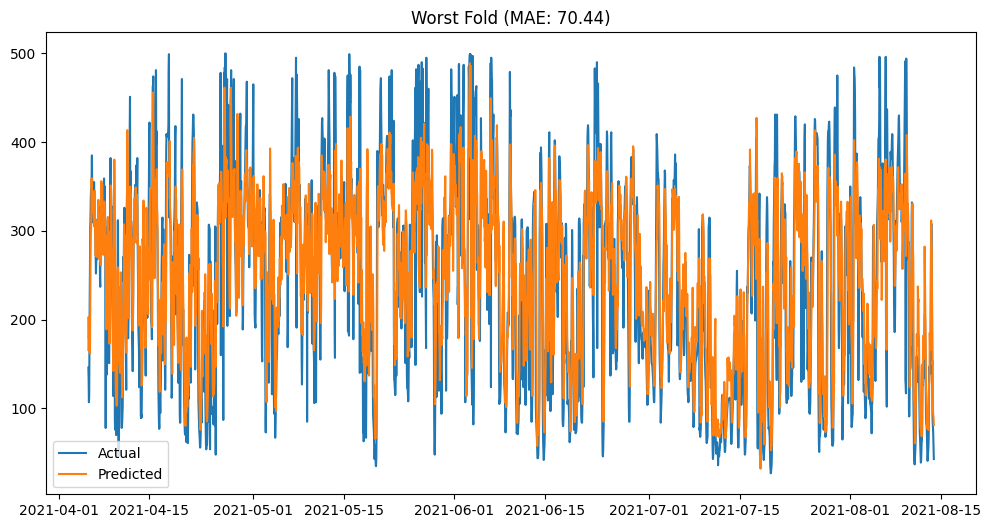

In [37]:
worst_fold_idx = np.argmax(cv_scores)
tscv = TimeSeriesSplit(n_splits=5)
for i, (train_idx, test_idx) in enumerate(tscv.split(X)):
    if i == worst_fold_idx:
        X_test_fold = X.iloc[test_idx]
        y_test_fold = y.iloc[test_idx]
        preds = model.predict(scaler.transform(X_test_fold))
        plt.figure(figsize=(12, 6))
        plt.plot(y_test_fold.index, y_test_fold, label='Actual')
        plt.plot(y_test_fold.index, preds, label='Predicted')
        plt.title(f"Worst Fold (MAE: {cv_scores[i]:.2f})")
        plt.legend()
        plt.show()
        break

In [62]:
data = [[
    730,  # co
    12,   # no2
    8,    # o3
    3,    # so2
    33,   # pm2_5
    109,  # pm10
    96,   # AQI_lag1
    93,   # AQI_lag2
    90,   # AQI_lag3
    730,  # co_lag1
    728,  # co_lag2
    680,  # co_lag3
    12,   # no2_lag1
    12,   # no2_lag2
    12,   # no2_lag3
    8,    # o3_lag1
    8,    # o3_lag2
    9,    # o3_lag3
    3,    # so2_lag1
    3,    # so2_lag2
    3,    # so2_lag3
    33,   # pm2_5_lag1
    32,   # pm2_5_lag2
    30,   # pm2_5_lag3
    109,  # pm10_lag1
    109,  # pm10_lag2
    101,  # pm10_lag3
    None  # target (placeholder for prediction)
]]

In [63]:
columns = [
    'co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
    'AQI_lag1', 'AQI_lag2', 'AQI_lag3',
    'co_lag1', 'co_lag2', 'co_lag3',
    'no2_lag1', 'no2_lag2', 'no2_lag3',
    'o3_lag1', 'o3_lag2', 'o3_lag3',
    'so2_lag1', 'so2_lag2', 'so2_lag3',
    'pm2_5_lag1', 'pm2_5_lag2', 'pm2_5_lag3',
    'pm10_lag1', 'pm10_lag2', 'pm10_lag3',
    'target'
]

In [64]:
df_live = pd.DataFrame(data, columns=columns)
print(df_live)

    co  no2  o3  so2  pm2_5  pm10  AQI_lag1  AQI_lag2  AQI_lag3  co_lag1  ...  \
0  730   12   8    3     33   109        96        93        90      730  ...   

   so2_lag1  so2_lag2  so2_lag3  pm2_5_lag1  pm2_5_lag2  pm2_5_lag3  \
0         3         3         3          33          32          30   

   pm10_lag1  pm10_lag2  pm10_lag3  target  
0        109        109        101    None  

[1 rows x 28 columns]


In [57]:
scaler = StandardScaler()

In [65]:
predicted_aqi = model.predict(features_df)

ValueError: Feature shape mismatch, expected: 28, got 27